# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, we are an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, we will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Our task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, we will identify patterns, outliers, and correlations in the data, allowing us to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, we will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset we will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`.

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Task 1: Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Online Retail.xlsx")

## Task 2: Exploring the Data

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### The Data Types seem to be appropriate. We see that there are null values in Description and CustomerID columns.

## Task 3: Finding and Removing Duplicates

In [5]:
df[df.duplicated()].count()

InvoiceNo      5268
StockCode      5268
Description    5268
Quantity       5268
InvoiceDate    5268
UnitPrice      5268
CustomerID     5225
Country        5268
dtype: int64

In [6]:
df = df.drop_duplicates()

## Task 4: Finding and Removing Null Values

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

### 4.1 Let's find the most frequent value in Description

In [8]:
df['Description'].value_counts().idxmax()

'WHITE HANGING HEART T-LIGHT HOLDER'

### 4.2 Replacing the Null values in Description with the most frequent value

In [9]:
df['Description'].fillna("WHITE HANGING HEART T-LIGHT HOLDER", inplace=True)

### 4.3 Removing Unnecessary Columns

In [10]:
df = df.drop(['InvoiceNo', 'StockCode', 'CustomerID'], axis=1)

### 4.4 Renaming Columns

In [11]:
df.rename(columns={"InvoiceDate": "Date", "Description": "Product", "UnitPrice": "Price"}, inplace=True)

### 4.5 Creating new columns for Year, Month and Weekday

In [12]:
df['Year'] = df['Date'].dt.year

In [13]:
df['Month'] = df['Date'].dt.month_name().str[:3]

In [14]:
df['Day'] = df['Date'].dt.day_name()

### 4.6 Dropping the Date column

In [15]:
df.drop('Date', axis=1, inplace=True)

### 4.7 Checking the data

In [16]:
df.describe()

,Quantity,Price,Year
count,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,2010.921771
std,219.130156,97.233118,0.268532
min,-80995.000000,-11062.060000,2010.000000
25%,1.000000,1.250000,2011.000000
50%,3.000000,2.080000,2011.000000
75%,10.000000,4.130000,2011.000000
max,80995.000000,38970.000000,2011.000000


### It seems that the Quantity and Price columns have negative values. This could be due to human error. We will convert these to positive values.

In [17]:
df['Quantity'] = df['Quantity'].abs()

In [18]:
df.describe()

,Quantity,Price,Year
count,536641.000000,536641.000000,536641.000000
mean,11.418315,4.632656,2010.921771
std,219.043814,97.233118,0.268532
min,1.000000,-11062.060000,2010.000000
25%,1.000000,1.250000,2011.000000
50%,3.000000,2.080000,2011.000000
75%,11.000000,4.130000,2011.000000
max,80995.000000,38970.000000,2011.000000


In [19]:
df['Price'] = df['Price'].abs()

In [20]:
df.describe()

,Quantity,Price,Year
count,536641.000000,536641.000000,536641.000000
mean,11.418315,4.715110,2010.921771
std,219.043814,97.229154,0.268532
min,1.000000,0.000000,2010.000000
25%,1.000000,1.250000,2011.000000
50%,3.000000,2.080000,2011.000000
75%,11.000000,4.130000,2011.000000
max,80995.000000,38970.000000,2011.000000


## Task 5: Finding and Removing Outliers

### 5.1 Plotting a box plot of the Quantity column to check for outliers

<Axes: xlabel='Quantity'>

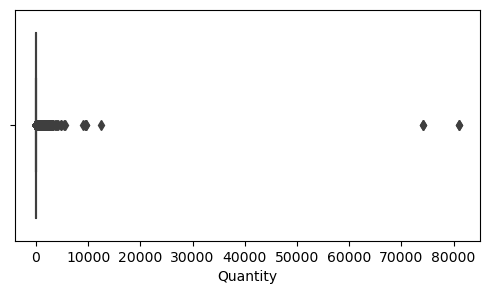

In [21]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Quantity', data=df)

### 5.2 We need to remove the higher outliers in order to do a reasonable analysis

In [22]:
q_hi  = df["Quantity"].quantile(0.95)
df = df[(df["Quantity"] < q_hi)]

### 5.3 Checking to see what does the distribution look like after removing outliers

<Axes: xlabel='Quantity'>

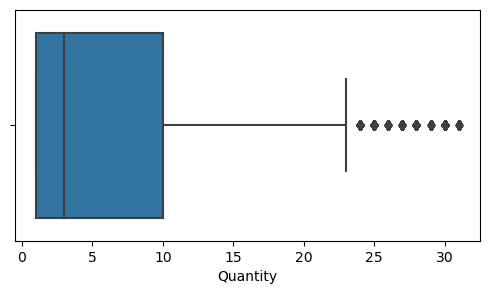

In [23]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Quantity', data=df)

### 5.4 Plotting the box plot of the Price column

<Axes: xlabel='Price'>

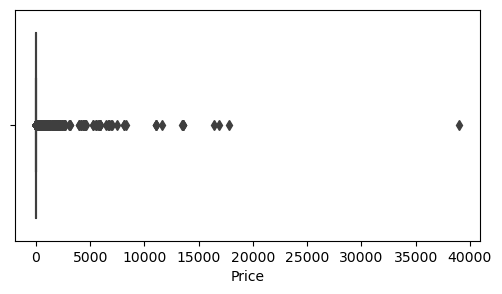

In [24]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Price', data=df)

### 5.5 We need to remove the higher outliers in order to do a reasonable analysis

In [25]:
p_hi  = df["Price"].quantile(0.95)
df = df[(df["Price"] < p_hi)]

### 5.6 Checking to see what does the distribution look like after removing outliers

<Axes: xlabel='Price'>

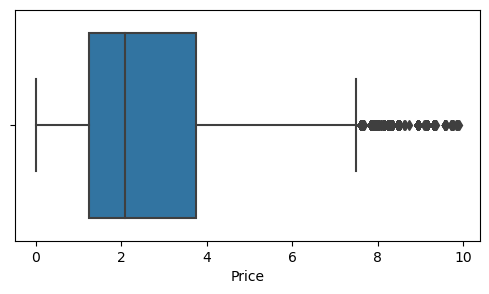

In [26]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Price', data=df)

### 5.7 Looking at the distribution of Quantity

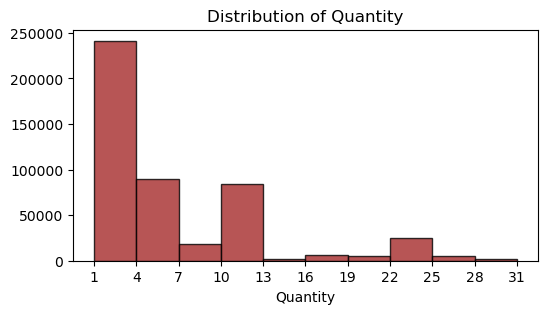

In [27]:
plt.figure(figsize=(6,3))
ax = df.Quantity.hist(bins=10, alpha=0.8, grid=False, color="brown", ec="black")
plt.title("Distribution of Quantity")
ax.set_xlabel("Quantity")
ax.set_xticks([1,4,7,10,13,16,19,22,25,28,31])
plt.show()

### 5.8 Looking at the distribution of Price

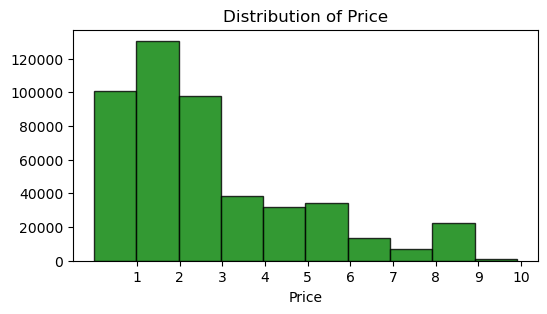

In [28]:
plt.figure(figsize=(6,3))
ax = df.Price.hist(bins=10, alpha=0.8, grid=False, color="green", ec="black")
plt.title("Distribution of Price")
ax.set_xlabel("Price")
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

 ## Task 6: Exploring Seasonality

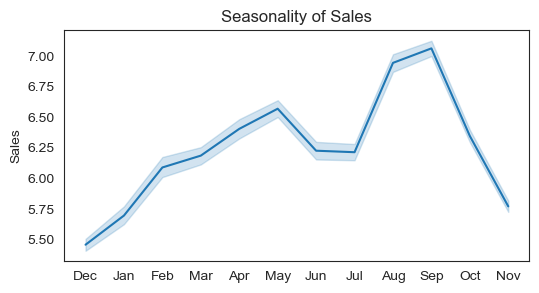

In [63]:
plt.figure(figsize=(6,3))
sns.lineplot(y='Quantity', x='Month', data=df)
plt.ylabel("Sales")
plt.xlabel(None)
plt.title("Seasonality of Sales")
plt.show()

### 6.1 Plotting a box plot of Monthwise Sales

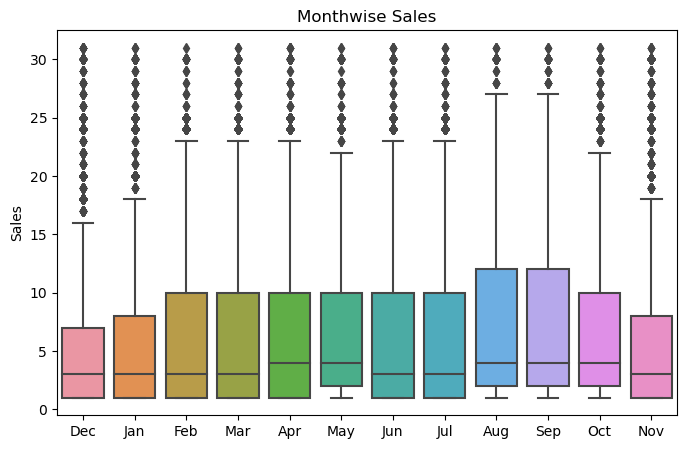

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Month", y="Quantity", data=df)
plt.title("Monthwise Sales")
plt.ylabel("Sales")
plt.xlabel(None)
plt.show()

### 6.2 Exploring Daywise seasonality

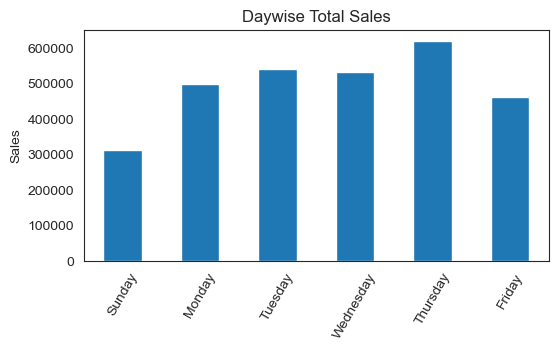

In [57]:
sns.set_style("white")
df.groupby('Day')['Quantity'].sum().sort_values(ascending=False).loc[['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].plot(kind='bar', figsize=(6,3), rot=60)
plt.title('Daywise Total Sales')
plt.ylabel('Sales')
plt.xlabel(None)
plt.show()

### 6.3 Plotting a box plot of Daywise Sales

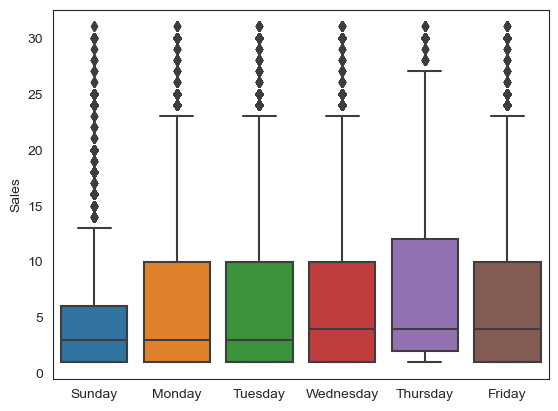

In [58]:
sns.boxplot(x="Day", y="Quantity", data=df, order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.ylabel("Sales")
plt.xlabel(None)
plt.show()

## Question : What are the Top 10 countries by Sales?

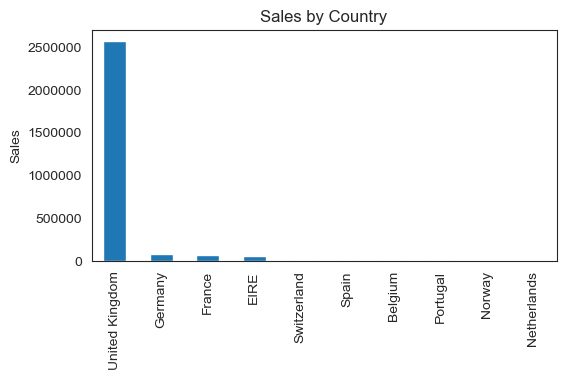

In [59]:
plt.ticklabel_format(style='plain')
df.groupby('Country')['Quantity'].sum().nlargest(10).plot(kind='bar', figsize=(6,3))
plt.title('Sales by Country')
plt.xlabel(None)
plt.ylabel('Sales')
plt.show()

### The sales in the United Kingdom far surpass the sales in any other country. Let us see the distribution when United Kingdom has been removed.

In [34]:
df1 = df[df["Country"] != "United Kingdom"]

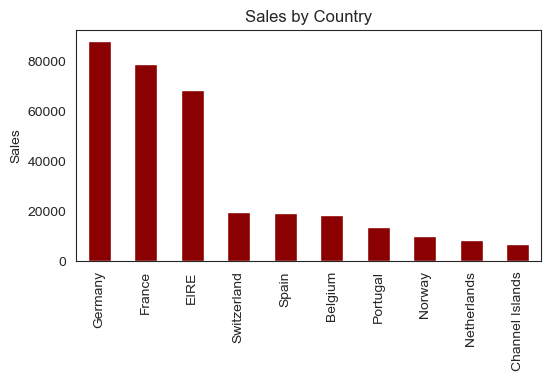

In [60]:
df1.groupby('Country')['Quantity'].sum().nlargest(10).plot(kind='bar', figsize=(6,3), color='darkred')
plt.title('Sales by Country')
plt.xlabel(None)
plt.ylabel('Sales')
plt.show()

## Question: What are the Top 10 products by Sales?

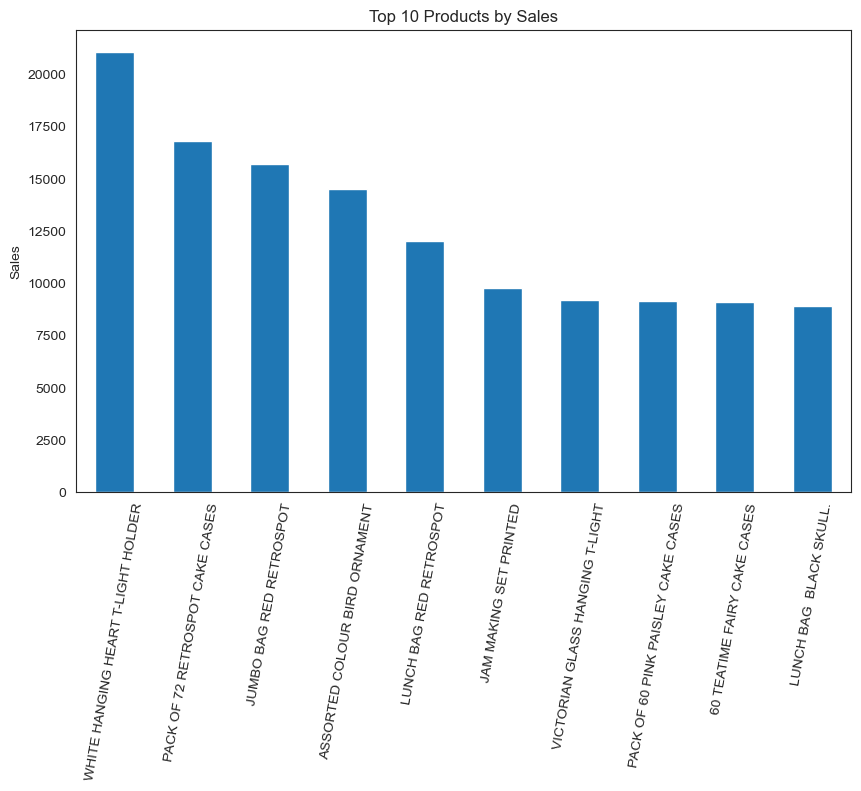

In [61]:
df.groupby('Product')['Quantity'].sum().nlargest(10).plot(kind='bar', figsize=(10,6), rot=80)
plt.title('Top 10 Products by Sales')
plt.ylabel('Sales')
plt.xlabel(None)
plt.show()

# Conclusion

The data contained some duplicates and some outliers. We removed irrelevant columns and split the date data for better analysis.

The Online Retail Store data contains several insights about customer behaviour. There is month-wise as well as day-wise seasonality.
The months of May, August and September see a rise in demand of the retail products. Whereas Thursday contains the highest sales of the week.

According to sales, the Top 3 countries are UK, Germany and France. United Kingdom surpasses all other countries in terms of Sales. This points to an opportunity because the company can focus on expanding in other countries to increase their sales.
The Top 3 Products are White Hanging Heart T-Light Holder, Pack of 72 Retrospot Cake Cases and Jumbo Bag Red Retrospot. It is recommended to divide the product data into categories. This could provide great insights into customer behaviour and preferences. 